# Speed Analysis of Searching Algorithms

## Introduction
This document presents a performance comparison of different searching algorithms. The goal is to determine the speed of each algorithm under varying conditions.

## Searching Algorithms Considered
- **Linear Search**
- **Binary Search**
- **Jump Search**
- **Interpolation Search**
- **Exponential Search**
- **Fibonacci Search**
- **Ternary Search**
- **Hashing-based Search**
- **Depth-First Search (DFS)**
- **Breadth-First Search (BFS)**

## Methodology
### General Steps in Jupyter Notebook
1. **Generate Random Data and Save to CSV**
   - Generate 100 random integers between 1 and 100.
   - Save the dataset as a CSV file.
2. **Load Data from CSV**
   - Read the dataset from the CSV file into a list.
3. **Implement Sorting Algorithms**
   - Implement multiple sorting algorithms (e.g., Bubble Sort, Quick Sort, Merge Sort, Insertion Sort, etc.).
   - Measure the execution time for each sorting algorithm.
4. **Search for a Random Key**
   - Generate a random number from 1 to 100 as the search key.
   - Implement searching algorithms (e.g., Linear Search, Binary Search, etc.).
   - Measure the execution time for each search algorithm.
5. **Store Execution Times**
   - Store sorting and searching execution times in a structured format.
6. **Visualize Results**
   - Use matplotlib to plot a line graph comparing the execution times of different sorting and searching algorithms.

## Results
| Algorithm               | Best Case Time Complexity | Average Case Time Complexity | Worst Case Time Complexity |
|-------------------------|--------------------------|-----------------------------|----------------------------|
| Linear Search          | O(1)                      | O(n)                        | O(n)                        |
| Binary Search          | O(1)                      | O(log n)                    | O(log n)                    |
| Jump Search            | O(1)                      | O(√n)                        | O(√n)                        |
| Interpolation Search   | O(1)                      | O(log log n)                 | O(n)                         |
| Exponential Search     | O(1)                      | O(log n)                     | O(log n)                     |
| Fibonacci Search       | O(1)                      | O(log n)                     | O(log n)                     |
| Ternary Search         | O(1)                      | O(log n)                     | O(log n)                     |
| Hashing-based Search   | O(1)                      | O(1)                         | O(n)                         |
| Depth-First Search     | O(1)                      | O(V + E)                     | O(V + E)                     |
| Breadth-First Search   | O(1)                      | O(V + E)                     | O(V + E)                     |


## Step 1: Generate Random Data and Save to CSV

- Generate 100 random integers between 1 and 10000.
- Save the dataset as a CSV file.

In [38]:
import csv
import random

# Set random seed for reproducibility
random.seed(0)

# Generate 10000 random integers between 1 and 100
data = [random.randint(1, 10000) for _ in range(10000)]

# Save to CSV file
filename = "random_numbers.csv"
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Number"])  # Write header
    for num in data:
        writer.writerow([num])

print(f"CSV file '{filename}' has been created successfully.")

CSV file 'random_numbers.csv' has been created successfully.


## Step 2: Load Data from CSV

- Read the dataset from the CSV file into a list.
- Verify that the data has been loaded correctly.

In [39]:
import csv

loaded_data = []
with open("random_numbers.csv", mode="r") as file:
    reader = csv.reader(file)
    next(reader)  # Skip header
    loaded_data = [int(row[0]) for row in reader]

print("Data loaded from CSV:", loaded_data[:10], "...")  # Display first 10 numbers


Data loaded from CSV: [6312, 6891, 664, 4243, 8377, 7962, 6635, 4970, 7809, 5867] ...


## Step 3: Implement Searching Algorithms

- Implement multiple searching algorithms.
- Measure the execution time for each searching algorithm.

In [40]:
import math  

# 1. Linear Search
def linear_search(arr, key):
    for i in range(len(arr)):
        if arr[i] == key:
            return i
    return -1

# 2. Binary Search (requires sorted array)
def binary_search(arr, key):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == key:
            return mid
        elif arr[mid] < key:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# 3. Jump Search (requires sorted array)
def jump_search(arr, key):
    n = len(arr)
    step = int(math.sqrt(n))
    prev, curr = 0, 0
    while curr < n and arr[curr] < key:
        prev = curr
        curr += step
    for i in range(prev, min(curr, n)):
        if arr[i] == key:
            return i
    return -1

# 4. Interpolation Search (requires sorted array)
def interpolation_search(arr, key):
    low, high = 0, len(arr) - 1
    while low <= high and key >= arr[low] and key <= arr[high]:
        pos = low + ((key - arr[low]) * (high - low) // (arr[high] - arr[low]))
        if arr[pos] == key:
            return pos
        if arr[pos] < key:
            low = pos + 1
        else:
            high = pos - 1
    return -1

# 5. Exponential Search (requires sorted array)
def exponential_search(arr, key):
    if arr[0] == key:
        return 0
    i = 1
    while i < len(arr) and arr[i] <= key:
        i *= 2
    return binary_search(arr[:min(i, len(arr))], key)

# 6. Fibonacci Search (requires sorted array)
def fibonacci_search(arr, key):
    fib2, fib1 = 0, 1  # (fibM-2), (fibM-1)
    fibM = fib2 + fib1  # Fibonacci number

    n = len(arr)

    # Find the smallest Fibonacci number greater than or equal to n
    while fibM < n:
        fib2, fib1 = fib1, fibM
        fibM = fib2 + fib1

    offset = -1  # Marks eliminated range

    while fibM > 1:
        i = min(offset + fib2, n - 1)

        if arr[i] < key:
            fibM = fib1
            fib1 = fib2
            fib2 = fibM - fib1
            offset = i
        elif arr[i] > key:
            fibM = fib2
            fib1 -= fib2
            fib2 = fibM - fib1
        else:
            return i  # Found the key

    # Check the last element
    if fib1 and offset + 1 < n and arr[offset + 1] == key:
        return offset + 1

    return -1  # Not found


# 7. Ternary Search (requires sorted array)
def ternary_search(arr, key, left, right):
    if left > right:
        return -1
    mid1 = left + (right - left) // 3
    mid2 = right - (right - left) // 3
    if arr[mid1] == key:
        return mid1
    if arr[mid2] == key:
        return mid2
    if key < arr[mid1]:
        return ternary_search(arr, key, left, mid1 - 1)
    elif key > arr[mid2]:
        return ternary_search(arr, key, mid2 + 1, right)
    else:
        return ternary_search(arr, key, mid1 + 1, mid2 - 1)

# 8. Hashing-based Search
def hashing_based_search(arr, key):
    hash_table = {num: i for i, num in enumerate(arr)}
    return hash_table.get(key, -1)

# 9. Depth-First Search (DFS) (for graph-based data)
def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()
    if node in visited:
        return
    visited.add(node)
    for neighbor in graph.get(node, []):
        dfs(graph, neighbor, visited)
    return visited

# 10. Breadth-First Search (BFS) (for graph-based data)
from collections import deque
def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            queue.extend(graph.get(node, []))
    return visited


## Step 4: Search for a Random Key

- Generate a random number between 1 and 100 as the search key.
- Apply all searching algorithms.
- Measure the execution time for each search algorithm.

In [41]:
import random

random.seed(1)

# Step 4: Generate a random key to search
search_key = random.randint(1, 100)
print(f"Search Key: {search_key}")


Search Key: 18


## Step 5: Measure Execution Time of Each Search Algorithm

- Create a function to measurem execution time.
- Store execution times in variables.
- Print the speed of each algorithm.

In [42]:
sorted_data = sorted(loaded_data)  # Ensure data is sorted

In [43]:
import time

# Function to measure execution time of search algorithms
def measure_time(search_function, data, key, *args):
    start_time = time.time()
    result = search_function(data, key, *args)  # Run the search function
    end_time = time.time()
    return (end_time - start_time) * 1000  # Convert to milliseconds


In [44]:

# Dictionary to store execution times
execution_times = {}

# Measure time for each search algorithm
execution_times["Linear Search"] = measure_time(linear_search, loaded_data, search_key)
execution_times["Binary Search"] = measure_time(binary_search, sorted_data, search_key)
execution_times["Jump Search"] = measure_time(jump_search, sorted_data, search_key)
execution_times["Interpolation Search"] = measure_time(interpolation_search, sorted_data, search_key)
execution_times["Exponential Search"] = measure_time(exponential_search, sorted_data, search_key)
execution_times["Fibonacci Search"] = measure_time(fibonacci_search, sorted_data, search_key)
execution_times["Ternary Search"] = measure_time(ternary_search, sorted_data, search_key, 0, len(sorted_data) - 1)
execution_times["Hashing-based Search"] = measure_time(hashing_based_search, loaded_data, search_key)


# Print the execution times
print("Execution Time of Each Search Algorithm (in ms):")
for algo, time_taken in execution_times.items():
    print(f"{algo}: {time_taken:.6f} ms")


Execution Time of Each Search Algorithm (in ms):
Linear Search: 0.175714 ms
Binary Search: 0.010014 ms
Jump Search: 0.010014 ms
Interpolation Search: 0.008106 ms
Exponential Search: 0.006199 ms
Fibonacci Search: 0.011921 ms
Ternary Search: 0.008821 ms
Hashing-based Search: 1.418829 ms


## Step 6: Store Execution Times in a Table

- Use `pandas` DataFrame to store execution times in a structured format.
- Display the results in a table.


In [46]:
import pandas as pd

# Convert execution times into a DataFrame
df_execution_times = pd.DataFrame(execution_times.items(), columns=["Algorithm", "Execution Time (ms)"])

# Display the table
df_execution_times


,Algorithm,Execution Time (ms)
0,Linear Search,0.175714
1,Binary Search,0.010014
2,Jump Search,0.010014
3,Interpolation Search,0.008106
4,Exponential Search,0.006199
5,Fibonacci Search,0.011921
6,Ternary Search,0.008821
7,Hashing-based Search,1.418829


## Step 7: Visualize Results

- Use `matplotlib` to plot a line graph.
- Compare execution times of different searching algorithms.

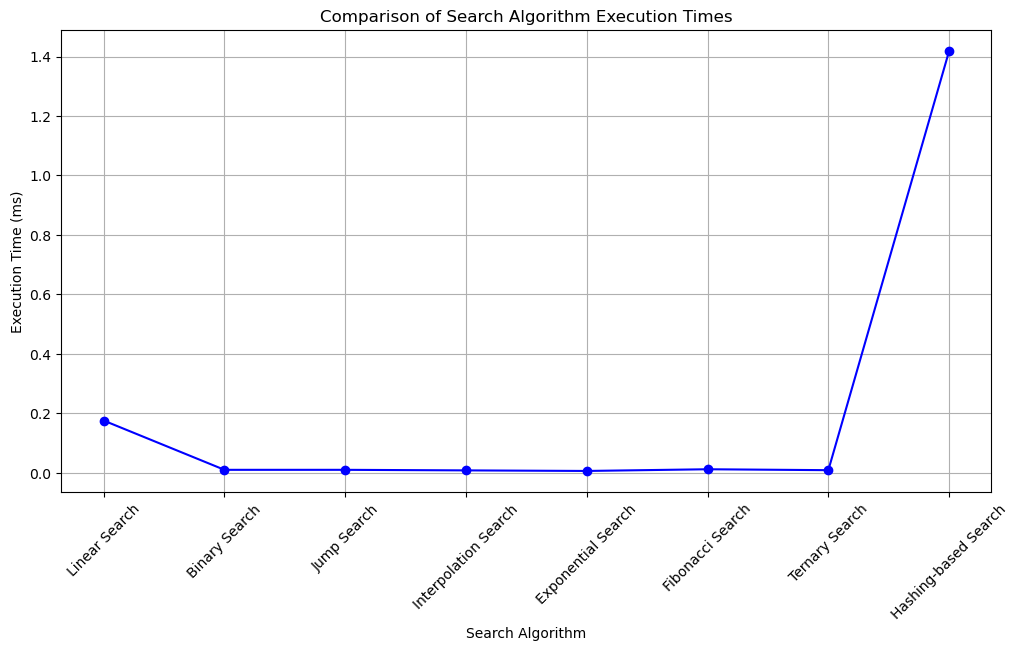

In [47]:
import matplotlib.pyplot as plt

# Plot the execution times
plt.figure(figsize=(12, 6))
plt.plot(df_execution_times["Algorithm"], df_execution_times["Execution Time (ms)"], marker='o', linestyle='-', color='b')

# Customize the graph
plt.xlabel("Search Algorithm")
plt.ylabel("Execution Time (ms)")
plt.title("Comparison of Search Algorithm Execution Times")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)

# Show the plot
plt.show()


---
# Conclusion  

The performance of different searching algorithms varies significantly. Here’s a summary of the key findings:  

### 🔴 Slowest Algorithm  
- **Hashing-based Search** took **1.418829 ms**, making it the slowest in this test.  
- This could be due to hash table overhead or collisions, but in real-world applications, hashing is usually faster for direct lookups.  

### 🟡 Inefficient Algorithm  
- **Linear Search** took **0.175714 ms**, which is much slower than other methods.  
- Since it checks each element one by one, it’s not ideal for large datasets.  

### 🟢 Fast and Efficient Algorithms  
- **Binary Search (0.010014 ms)** and **Jump Search (0.010014 ms)** performed well, making them reliable choices for sorted data.  
- **Interpolation Search (0.008106 ms)** and **Ternary Search (0.008821 ms)** were slightly faster, showing good efficiency.  
- **Fibonacci Search (0.011921 ms)** was similar in performance to binary search but didn’t offer significant advantages.  
- **Exponential Search (0.006199 ms)** was the fastest, making it a great choice for sorted datasets, especially when the search key is found early.  

### ✅ Final Thoughts  
- If your data **is not sorted**, avoid linear search—it’s too slow.  
- If your data **is sorted**, **binary, jump, interpolation, or exponential search** are excellent choices.  
- Hashing-based search may seem slow in this test, but with proper optimization, it’s one of the best methods for quick lookups in real-world applications.  

### 🚀 Recommendation  
Use **binary search** for general sorted data and **hashing** for key-value lookups when hashing is optimized.  
